#  XPCS   Pipeline 

 "This notebook corresponds to version {{ version }} of the pipeline tool: https://github.com/NSLS-II/pipelines"

## NSLS2 data retrieval imports

In [166]:
import sys, shutil
EssCod_PATH='/home/yuzhang/chx-pipelines/Develops/'
EssCod_PATH in sys.path or sys.path.append(EssCod_PATH)
from develop import * 

--- Logging error ---
Traceback (most recent call last):
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/logging/__init__.py", line 982, in emit
    self.flush()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/logging/__init__.py", line 962, in flush
    self.stream.flush()
BrokenPipeError: [Errno 32] Broken pipe
Call stack:
  File "<string>", line 1, in <module>
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 399, in main
    app.start()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 389, in start
    ioloop.IOLoop.instance().start()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/zmq/eventloop/ioloop.py", line 151, in start
    super(ZMQIOLoop, self).start()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/tornado/ioloop.py", line 866, in start
    handler_func(fd_obj, events)
  File "/h

In [165]:

%matplotlib notebook

--- Logging error ---
Traceback (most recent call last):
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/logging/__init__.py", line 982, in emit
    self.flush()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/logging/__init__.py", line 962, in flush
    self.stream.flush()
BrokenPipeError: [Errno 32] Broken pipe
Call stack:
  File "<string>", line 1, in <module>
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 399, in main
    app.start()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 389, in start
    ioloop.IOLoop.instance().start()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/zmq/eventloop/ioloop.py", line 151, in start
    super(ZMQIOLoop, self).start()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/tornado/ioloop.py", line 866, in start
    handler_func(fd_obj, events)
  File "/h

In [45]:
cd /home/yuzhang/chx-pipelines/Develops/

/home/yuzhang/chx-pipelines/Develops


### Lazy Eiger Handler (later will goto databroker)

### Get the events from the uid

In [3]:
uid = 'c423e856'

uid = '528bd8'
uid = '54614d43'
uid = '95782687'
uid= 'fa5fdae'

uid = 'ff9f20c0'
uid='71720966'
#uid = '377dad97'
hdr = db[uid]

In [6]:
ev, = get_events(hdr, ['eiger_4M_cam_img_image_lightfield'], fill = True)

hdf5 path = /XF11ID/data/2015/11/7/72705cfe-c7dc-4cc2-97a0_734_master.h5


In [7]:

dt = datetime.fromtimestamp(hdr['start'].time)
path ='/XF11ID/analysis' + '/%s/%s/%s/' % (dt.year, dt.month, dt.day)
path

'/XF11ID/analysis/2015/11/7/'

In [8]:
imgs = ev['data']['eiger_4M_cam_img_image_lightfield']
print (imgs)
Nimg=len(imgs)

<Frames>
Length: 15000 frames
Frame Shape: 2167 x 2070
Pixel Datatype: uint32


## load a mask if exist 
### otherwise create a mask using Mask pipeline

In [60]:

mask = np.load( path +  str(uid)+"_mask.npy")
 

####### Plot the mask

<IPython.core.display.Javascript object>


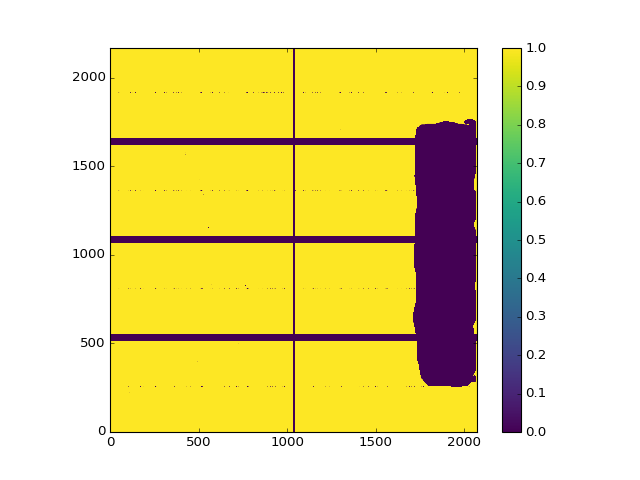

In [61]:
fig, ax = plt.subplots()
im=ax.imshow(mask, origin='lower' ,vmin=0, vmax=1,cmap='viridis')
fig.colorbar(im)
plt.show()

In [10]:
imgsr = Reverse_Coordinate(imgs, mask)    
masker = Masker( imgsr, mask)

In [11]:
imgsr.length

15000

In [12]:
imgsr[1000].max()

103

## Interactive way to browse through images.

### Note : Provide the number of images that you want to browse

In [15]:
#interact(view_image, i=(0, Nimg-1))


In [51]:
#%run develop.py

<IPython.core.display.Javascript object>


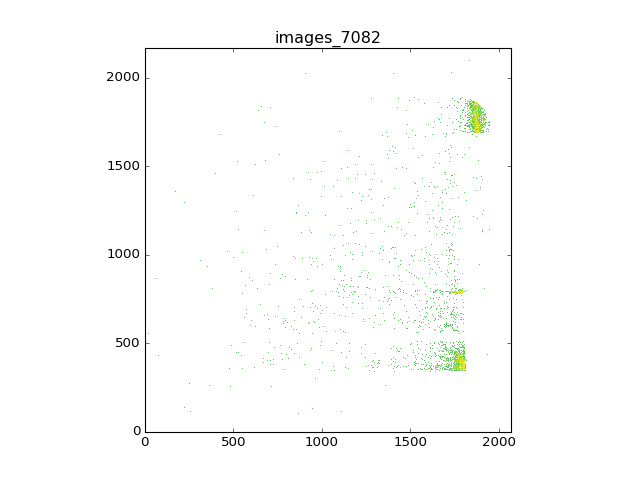

In [52]:
view_image_movie( imgsr,.1, 7080, 7081) 

### hey, let's see if any images are bad!

### Get the Averaged Image Data

In [62]:
good_start = 5500
good_end= 7000

avg_img = np.average( imgs[good_start:good_end: 10], axis=0) #*imgs.md['pixel_mask']  #*mask_rh

avg_img *=  mask

In [63]:
#avg_img = average_img( imgsr,0, 2000 )

In [64]:
avg_img  = avg_img[::-1,:] 

<IPython.core.display.Javascript object>


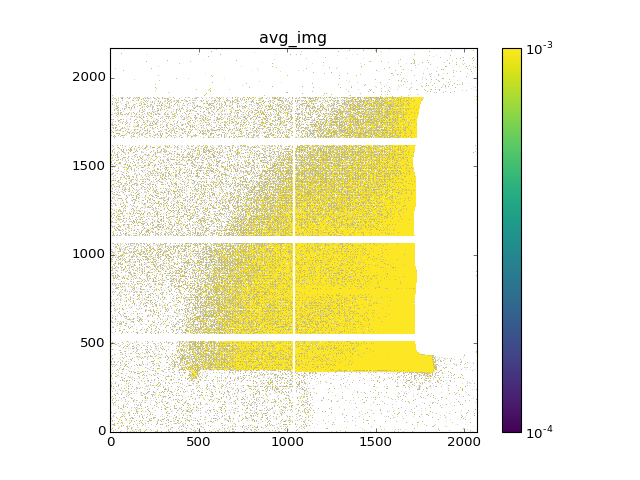

In [65]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(avg_img, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=1E-3))
fig.colorbar(im)
ax.set_title( 'avg_img')
plt.show()

## Plot the averged image with the mask

In [19]:
print (avg_img.max())

102.56


## Note:  experiment information 

* The physical size of the pixels
* Wavelegth of the X-rays  - (units in Angstroms)
* Detector to sample distance
* Exposure time - (units in seconds)
* acqusition period - (units in seconds)
* dead time - (units in seconds)
* time per frame = (exposure time + dead_time or acqusition period) - (units in seconds)

In [20]:
#imgs.md

In [21]:
# The physical size of the pixels
dpix = imgs.md['x_pixel_size'] * 1000.  
lambda_ = imgs.md['incident_wavelength']    # wavelegth of the X-rays in Angstroms
Ldet = 4810        # detector to sample distance (mm)

exposuretime= imgs.md['count_time']
acquisition_period = imgs.md['frame_time']

# deadtime= 0   # 60e-6 
# timeperframe = exposuretime + deadtime
timeperframe = acquisition_period  

timeperframe, exposuretime

(1.00001, 0.49998999)

## Import all the required packages for  Data Analysis

* scikit-xray - data analysis tools for X-ray science 
    - https://github.com/scikit-xray/scikit-xray
* xray-vision - plotting helper functions for X-ray science
    - https://github.com/Nikea/xray-vision


## Get the approximate center and see the statistic to make sure 

### Qz, Qr Average : to do!

# GiSAXS get q-map (qz and qr)

In [22]:
inc_x0 = 1874
inc_y0 = 334
refl_x0 = 1875
refl_y0 = 785      #1670
Lsd= 4.81
lamda= lambda_  #12.4/9

In [23]:
lamda

1.3776

In [24]:
#cd /home/yuzhang/chx-pipelines/Develops/

In [25]:
#%run develop.py

In [26]:
alphaf,thetaf, alphai, phi = get_reflected_angles( inc_x0, inc_y0,refl_x0 , refl_y0, Lsd=Lsd )

The incident_angle (alphai) is: 0.201455072389


In [27]:
qx, qy, qr, qz = convert_gisaxs_pixel_to_q( inc_x0, inc_y0,refl_x0,refl_y0, lamda=lamda, Lsd=Lsd )

The incident_angle (alphai) is: 0.201455072389


<IPython.core.display.Javascript object>


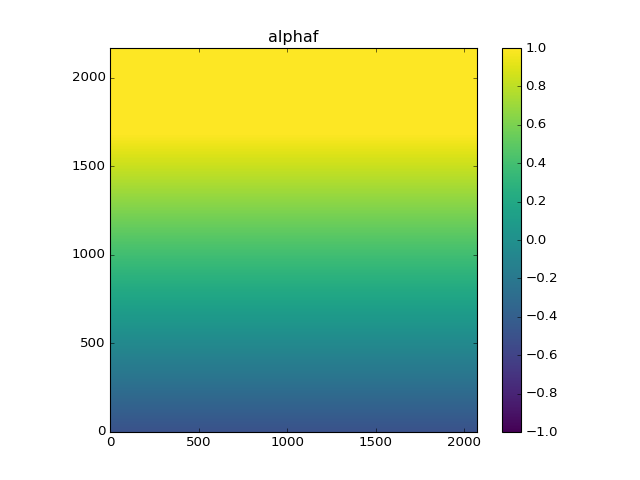

In [28]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(alphaf*180/np.pi, origin='lower' ,cmap='viridis',vmin=-1,vmax= 1 )
fig.colorbar(im)
ax.set_title( 'alphaf')
plt.show()

<IPython.core.display.Javascript object>


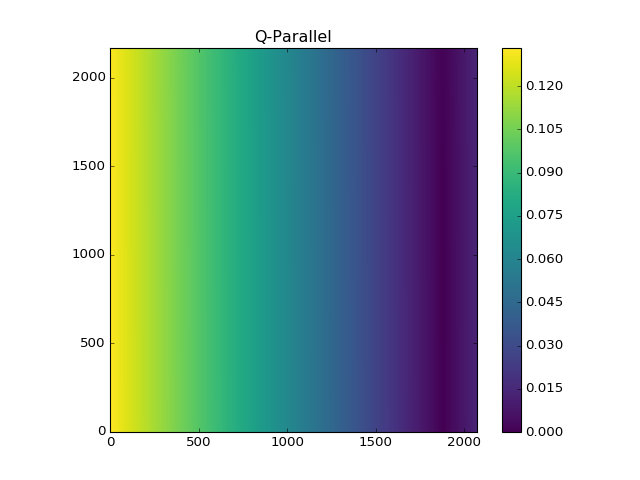

In [29]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(qr, origin='lower' ,cmap='viridis',vmin=qr.min(),vmax= qr.max() )
fig.colorbar(im)
ax.set_title( 'Q-Parallel')
plt.show()

<IPython.core.display.Javascript object>


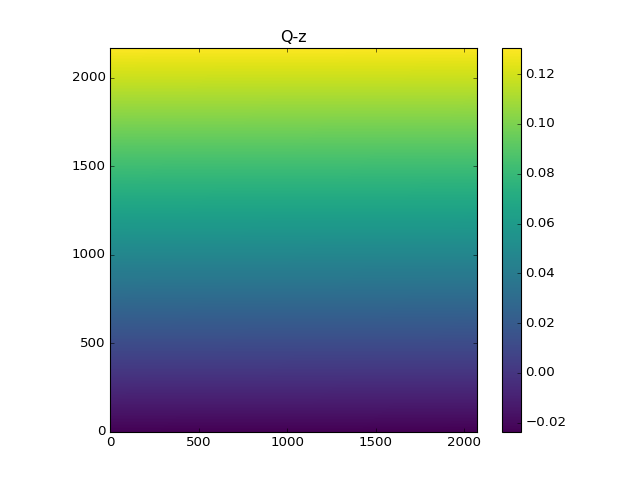

In [30]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(qz, origin='lower' ,cmap='viridis',vmin=qz.min(),vmax= qz.max() )
fig.colorbar(im)
ax.set_title( 'Q-z')
plt.show()

# get GiSAXS label array

<IPython.core.display.Javascript object>


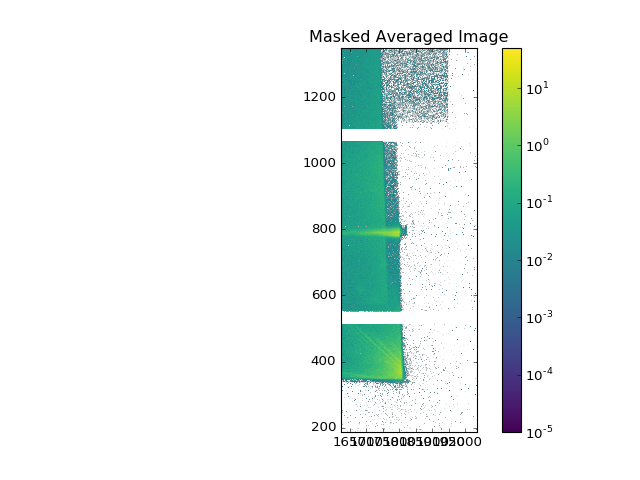

In [31]:
fig, ax = plt.subplots()
im = ax.imshow(avg_img, cmap='viridis', origin = 'lower',  norm= LogNorm( vmin=0.00001, vmax=.5e2 ) )
ax.set_title("Masked Averaged Image")
fig.colorbar(im)
plt.show()

# Get q||-intensity

In [32]:
#bin_img = 500
#Nbin = int( len(imgs)/bin_img )
#[ (i*bin_img, (i+1)*bin_img) for i in range(Nbin)               ]
#ave_img_series =  [   average_img( imgsr,i, i*bin_img )    for i in range(Nbin)                ]

In [33]:
vert_rect = ( ( 850, 0, 980- 850, 1600-0) , ( 570, 0, 700- 570, 1600-0) )    #(y,x, hight, wdith)

<IPython.core.display.Javascript object>


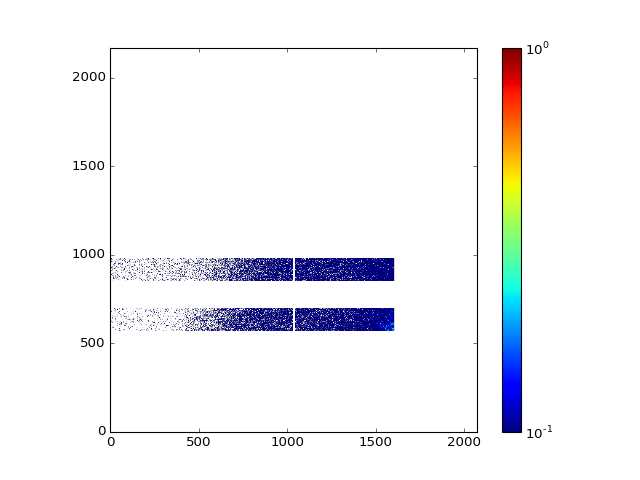

<IPython.core.display.Javascript object>


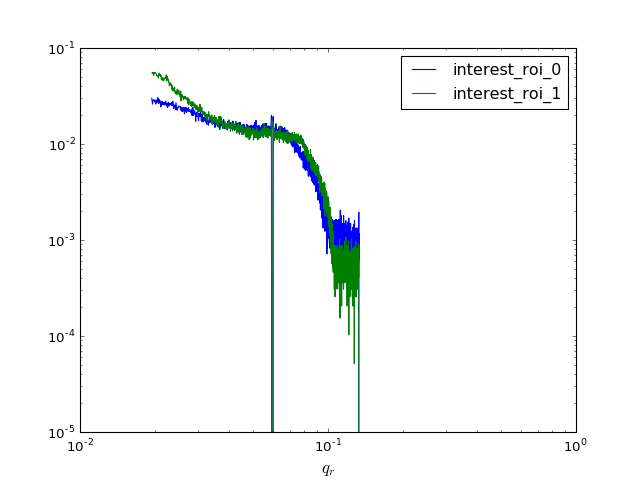

0 (850, 0, 130, 1600)
1 (570, 0, 130, 1600)


In [66]:
get_qr_intensity( qr, avg_img, vert_rect, show_roi=True)

In [141]:
qz_start = qz[670,0]
qz_end = qz[950,0]
qz_num= 2


qr_start =  qr[600,1700]
qr_end = qr[600,0]
qr_num = 15

In [142]:
qr[600,1700]

0.012332325632676489

In [143]:
qr_edge, qr_center = get_qedge(qr_start , qr_end, ( qr_end- qr_start)/qr_num, qr_num )

the qcenter is:  [ 0.01233233  0.02096486  0.02959739  0.03822992  0.04686245  0.05549498
  0.06412752  0.07276005  0.08139258  0.09002511  0.09865764  0.10729017
  0.11592271  0.12455524  0.13318777]


In [144]:
qz_edge, qz_center = get_qedge( qz_start,   qz_end,   (qz_end - qz_start)/(qz_num -0) , qz_num )

the qcenter is:  [ 0.02419035  0.04410174]


In [145]:
label_array_qz = get_qmap_label( qz, qz_edge)
label_array_qr = get_qmap_label( qr, qr_edge)
label_array_qzr,qzc,qrc = get_qzrmap(label_array_qz, label_array_qr,qz_center, qr_center  )

In [146]:
labels_qzr, indices_qzr = roi.extract_label_indices( label_array_qzr  )
labels_qz, indices_qz = roi.extract_label_indices( label_array_qz  )
labels_qr, indices_qr = roi.extract_label_indices( label_array_qr  )

In [147]:
num_qz = len(np.unique( labels_qz ))
num_qr = len(np.unique( labels_qr ))
num_qzr = len(np.unique( labels_qzr ))

In [148]:
num_qz,num_qr,num_qzr


(2, 15, 30)

<IPython.core.display.Javascript object>


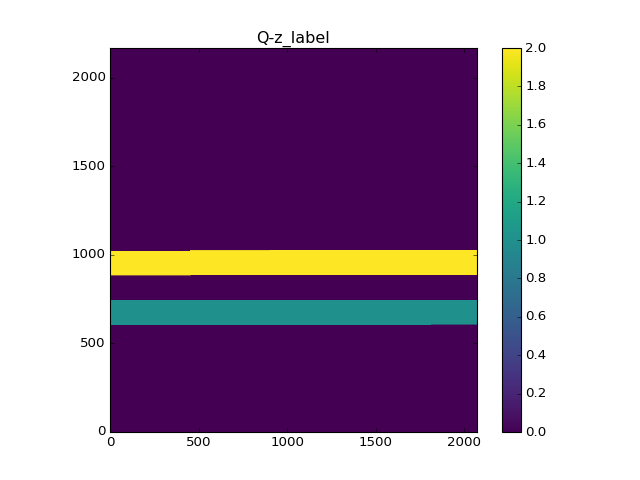

In [149]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(label_array_qz, origin='lower' ,cmap='viridis',vmin=0,vmax= None )
fig.colorbar(im)
ax.set_title( 'Q-z_label')
plt.show()

<IPython.core.display.Javascript object>


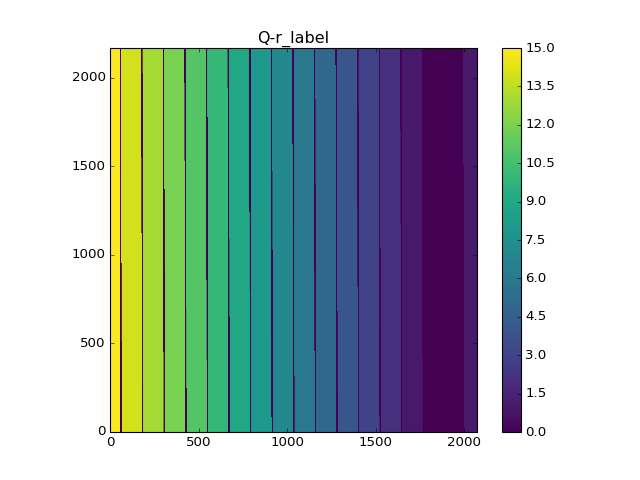

In [150]:
fig, ax = plt.subplots()
#im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
im=ax.imshow(label_array_qr, origin='lower' ,cmap='viridis',vmin=0,vmax= None )
fig.colorbar(im)
ax.set_title( 'Q-r_label')
plt.show()

<IPython.core.display.Javascript object>


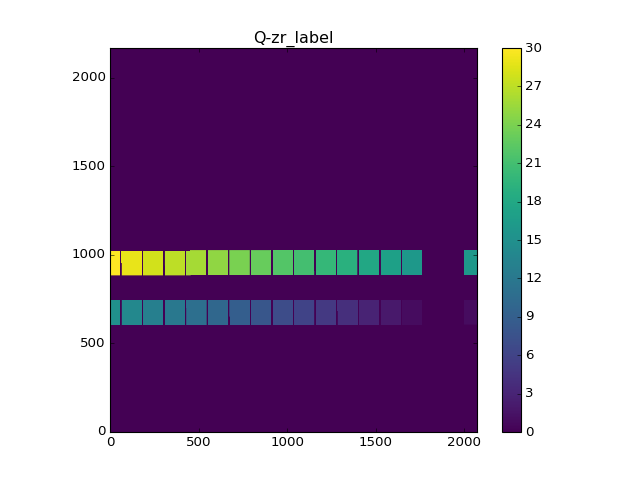

In [151]:
if True:
    fig, ax = plt.subplots()
    #im=ax.imshow(alphaf, origin='lower' ,cmap='viridis',norm= LogNorm(vmin=0.0001,vmax=2.00))
    im=ax.imshow(label_array_qzr, origin='lower' ,cmap='viridis',vmin=0,vmax= None )
    fig.colorbar(im)
    ax.set_title( 'Q-zr_label')
    plt.show()

In [153]:
rings = label_array_qzr 
ring_mask = rings*mask
labels, indices = roi.extract_label_indices(ring_mask)

## Number of pixels in each q ring

In [154]:
#ring_mask

In [155]:
nopr = np.bincount( np.array(labels, dtype=int) )[1:]
nopr

array([11048, 15934, 15820, 15881, 15855, 15400, 15942, 15818, 15912,
       15825, 15860, 15875, 15833, 15903,  7979, 11355, 15820, 15928,
       15823, 15895, 15283, 15820, 15926, 15820, 15943, 15823, 15904,
       15833, 15888,  7871])

# check one_qz_qr_region

In [156]:
#%run develop.py

<IPython.core.display.Javascript object>


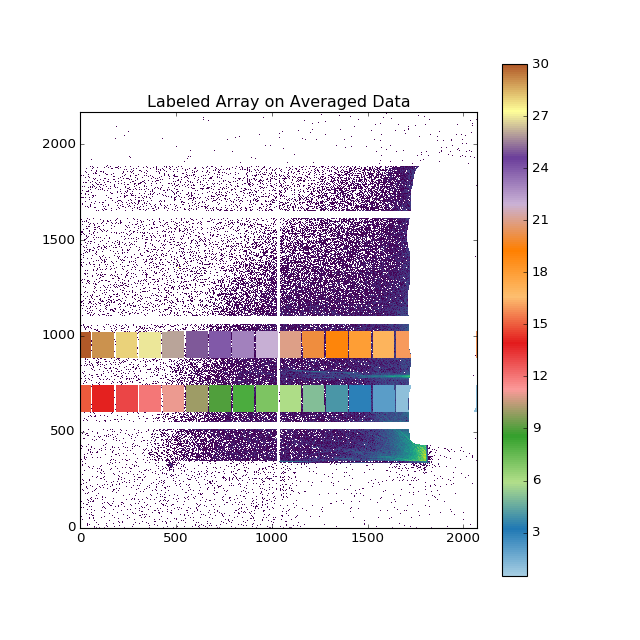

In [157]:

# plot the figure
fig, axes = plt.subplots(figsize=(8,8))
axes.set_title("Labeled Array on Averaged Data")
im,im_label = show_label_array_on_image(axes, avg_img, ring_mask, imshow_cmap='viridis', cmap='Paired',
                         vmin=0.01, vmax=30 ,  origin="lower")
#rwidth = 200 
#x1,x2 = [center[1] - rwidth, center[1] + rwidth]
#y1,y2 = [center[0] - rwidth, center[0] + rwidth]
#axes.set_xlim( [x1,x2])
#axes.set_ylim( [y1,y2])
fig.colorbar(im_label)
plt.show()

##  Kymograph(waterfall plot) of the 3rd ring

In [ ]:
#kymo = roi.kymograph(imgsr[::50], ring_mask, num = 1)

In [97]:
if False:
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_ylabel('Pixel')
    ax.set_xlabel('Frame')
    ax.set_title('Kymograph')

    im = ax.imshow(kymo.T, cmap='viridis', vmax=10)
    #fig.colorbar( im   )
    ax.set_aspect(0.002)
    plt.show()

##  Mean intensities for each interested qz_qr

In [98]:
#imgsr = Reverse_Coordinate(imgs, mask)    
#masker = Masker( imgsr, mask)

In [103]:
Nm=1

mask_data = masker[good_start:good_end:Nm]  #make  masker[::1] will be very slow!
mean_int_sets, index_list = roi.mean_intensity(mask_data, ring_mask)

In [104]:
mean_int_sets.shape

(1500, 30)

In [105]:
#Nm=50

<IPython.core.display.Javascript object>


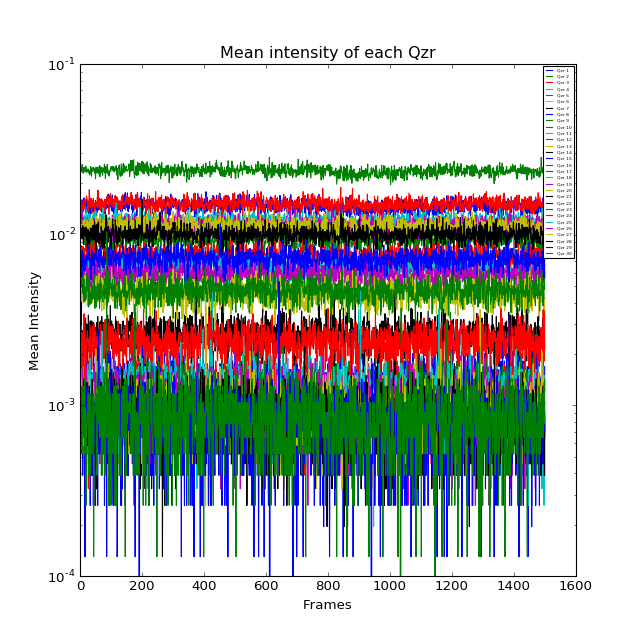

In [106]:
if True:
    time = np.arange(len(mask_data))*Nm  # get the time for each frame

    #%matplotlib inline
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_title("Mean intensity of each Qzr")
    for i in range(num_qzr):
        ax.plot(time, mean_int_sets[:,i], label="Qzr "+str(i+1))
        ax.set_xlabel("Frames")
        ax.set_ylabel("Mean Intensity")
        ax.set_yscale('log')
    ax.legend(fontsize=4) 
    plt.show()

## One time Correlation

Note : Enter the number of levels and number of buffers for Muliti tau one time correlation
number of buffers has to be even. More details in https://github.com/scikit-xray/scikit-xray/blob/master/skxray/core/correlation.py

In [107]:
#ring_mask = np.array( ring_mask, dtype=int)

In [108]:
good_start = 5500
good_end = 7000
#good_end = 6500

In [109]:
imgs_ =imgs[good_start: good_end-1]

In [110]:
imgsr2 = Reverse_Coordinate(imgs_, mask)    

In [114]:
num_lev = 14 
num_buf = 8

g2, lag_steps = corr.multi_tau_auto_corr(num_lev, num_buf,  ring_mask, imgsr2)

In [115]:
lags = lag_steps*timeperframe

In [120]:
lag_steps

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,   10,   12,
         14,   16,   20,   24,   28,   32,   40,   48,   56,   64,   80,
         96,  112,  128,  160,  192,  224,  256,  320,  384,  448,  512,
        640,  768,  896, 1024])

In [117]:
np.save( path + 'g2_%s-%s--%s'%(uid,good_start, good_end), g2)

In [118]:
num_qr, num_qz, num_qzr

(15, 2, 30)

### Plot the one time correlation functions

<IPython.core.display.Javascript object>


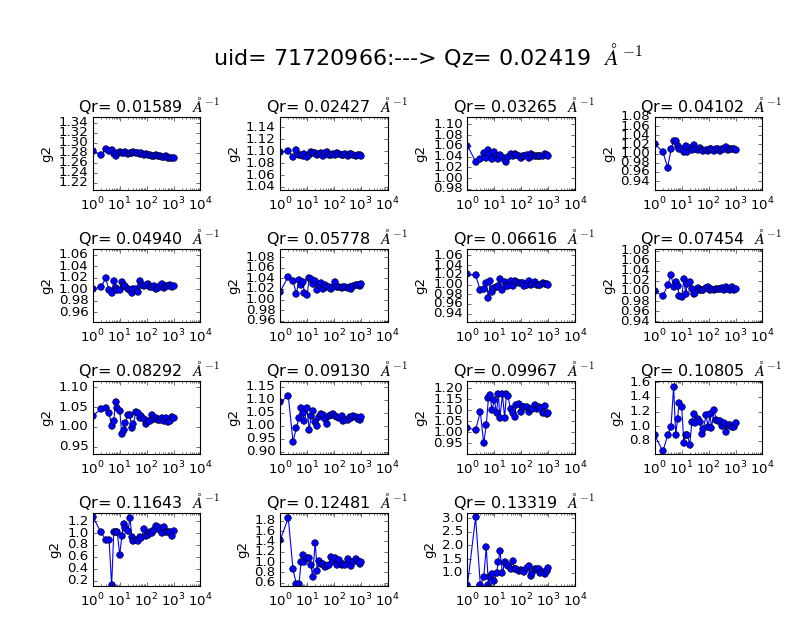

<IPython.core.display.Javascript object>


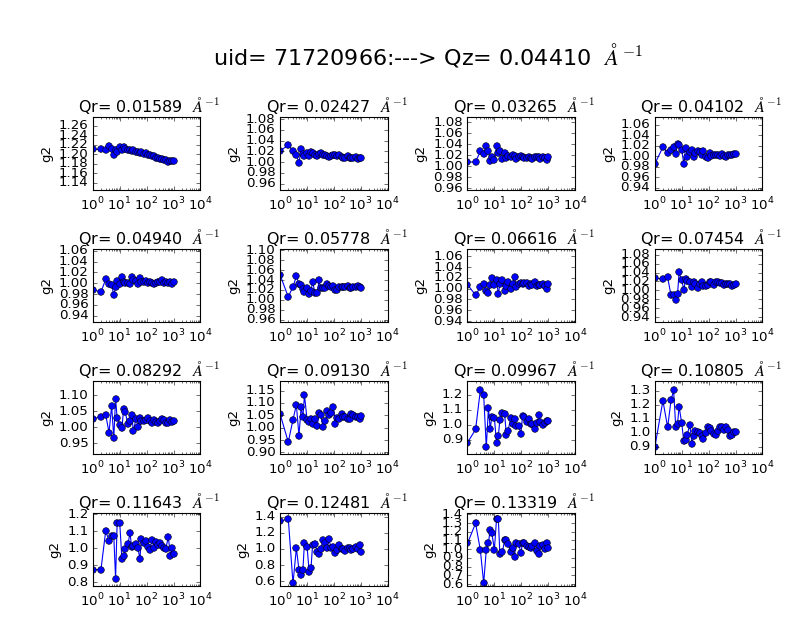

In [119]:

for qz_ind in range(num_qz):
    fig = plt.figure(figsize=(10, 8))
    title_qz = ' Qz= %.5f  '%( qz_center[qz_ind]) + r'$\AA^{-1}$' 
    plt.title('uid= %s:--->'%uid + title_qz,fontsize=20, y =1.1) 
    #print (qz_ind,title_qz)
    plt.axis('off')
    sx = int(round(np.sqrt(num_qr)) )
    if num_qr%sx == 0: 
        sy = int(num_qr/sx)
    else:
        sy=int(num_qr/sx+1) 
    for sn in range(num_qr):
        ax = fig.add_subplot(sx,sy,sn+1 )
        ax.set_ylabel("g2") 
        ax.set_title(" Qr= " + '%.5f  '%( qr_center[sn]) + r'$\AA^{-1}$')
        y=g2[:, sn + qz_ind * num_qr]
        ax.semilogx(lags, y, '-o', markersize=6) 
        ax.set_ylim([min(y)*.95, max(y[1:])*1.05 ])
    plt.show()
    fig.tight_layout()  


#np.save( path + 'g2_%s--%s'%(good_start, good_end), [lags,g2])
#lags,g2 = np.load( path + 'g2_%s--%s.npy'%(good_start, good_end) )

    

In [ ]:
#Two time correlation

In [ ]:
#%run develop.py

In [ ]:
from two_time import *

In [29]:
good_start= 0
good_end = 1000

In [ ]:
imgs_ =imgs[good_start: good_end-1]

In [ ]:
imgsr2 = Reverse_Coordinate(imgs_, mask)    

In [ ]:
#dly = delays( num_lev=3, num_buf=4, time = 1  )

In [ ]:
g12 = autocor_two_time(num_lev=2, num_buf= 1000,  ring_mask=ring_mask,
                       imgs = imgsr2,  start_img= 0, end_img= None  )

In [ ]:
np.save( path + 'g12_%s_%s_%s--%s'%(uid,good_start, good_end), g12)

In [161]:
uid

--- Logging error ---
Traceback (most recent call last):
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/logging/__init__.py", line 982, in emit
    self.flush()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/logging/__init__.py", line 962, in flush
    self.stream.flush()
BrokenPipeError: [Errno 32] Broken pipe
Call stack:
  File "<string>", line 1, in <module>
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 399, in main
    app.start()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 389, in start
    ioloop.IOLoop.instance().start()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/zmq/eventloop/ioloop.py", line 151, in start
    super(ZMQIOLoop, self).start()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/tornado/ioloop.py", line 866, in start
    handler_func(fd_obj, events)
  File "/h

'71720966'

--- Logging error ---
Traceback (most recent call last):
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/logging/__init__.py", line 982, in emit
    self.flush()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/logging/__init__.py", line 962, in flush
    self.stream.flush()
BrokenPipeError: [Errno 32] Broken pipe
Call stack:
  File "<string>", line 1, in <module>
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 399, in main
    app.start()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 389, in start
    ioloop.IOLoop.instance().start()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/zmq/eventloop/ioloop.py", line 151, in start
    super(ZMQIOLoop, self).start()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/tornado/ioloop.py", line 866, in start
    handler_func(fd_obj, events)
  File "/h

In [33]:
g12 = np.load( path + 'g12_%s_%s--%s.npy'%(uid,good_start, good_end))

In [160]:
#np.save( path + 'g12_%s_%s_%s--buf=%s'%(uid ,good_start, good_end, num_buf), g12)

--- Logging error ---
Traceback (most recent call last):
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/logging/__init__.py", line 982, in emit
    self.flush()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/logging/__init__.py", line 962, in flush
    self.stream.flush()
BrokenPipeError: [Errno 32] Broken pipe
Call stack:
  File "<string>", line 1, in <module>
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 399, in main
    app.start()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/ipykernel/kernelapp.py", line 389, in start
    ioloop.IOLoop.instance().start()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/zmq/eventloop/ioloop.py", line 151, in start
    super(ZMQIOLoop, self).start()
  File "/home/yuzhang/.conda/envs/user_analysis/lib/python3.4/site-packages/tornado/ioloop.py", line 866, in start
    handler_func(fd_obj, events)
  File "/h

<IPython.core.display.Javascript object>


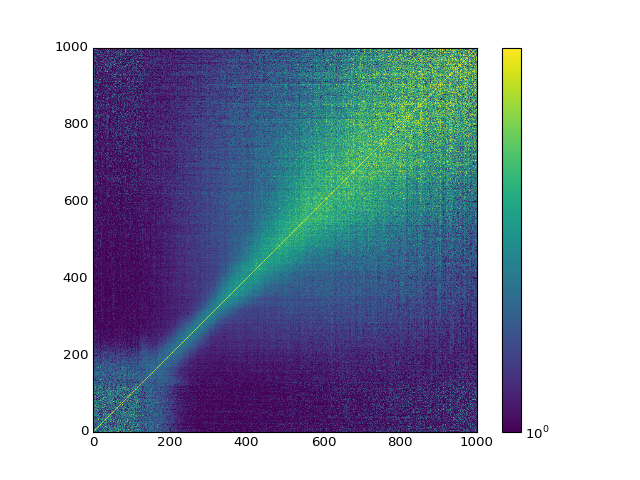

In [34]:
N12 = 16

fig, ax = plt.subplots()
im=ax.imshow(g12[:,:,N12], origin='lower' , cmap='viridis', 
             norm= LogNorm( vmin=1.0, vmax= 1.2 ) )
fig.colorbar(im)
plt.show()

In [ ]:
%run two_time.py

In [ ]:
num_lev, num_buf,  ring_mask, imgs

In [ ]:
dly